In [1]:
# SQL Alchemy
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# PyMySQL 
import pymysql
import config
pymysql.install_as_MySQLdb()

In [2]:
engine = create_engine("mysql://root:"+ config.root_pwd + "@localhost/simpsons")
conn = engine.connect()
#user:pass@host:port/schema

In [3]:
# season average episode imdb rating
season_df = pd.read_sql('select season, avg(imdb_rating) "Avg_rating" from episodes group by season', conn)
season_df

,season,Avg_rating
0,1,7.807692
1,2,8.040909
2,3,8.154167
3,4,8.268182
4,5,8.336364
5,6,8.312000
6,7,8.324000
7,8,8.220000
8,9,7.844000
9,10,7.569565


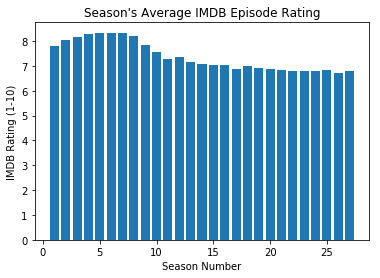

In [7]:
#plotted average episode rating per season
ep_1 = plt.bar(season_df["season"], season_df["Avg_rating"], align="center")
plt.title("Season's Average IMDB Episode Rating")
plt.ylabel("IMDB Rating (1-10)")
plt.xlabel("Season Number")
plt.savefig("static/images/1Season_rating.png")

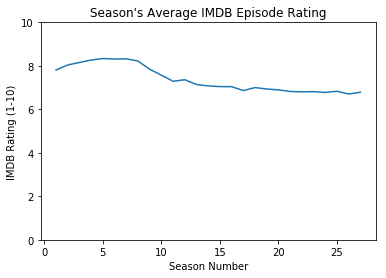

In [6]:
#plotted average episode rating per season
ep_1 = plt.plot(season_df["season"], season_df["Avg_rating"])
plt.title("Season's Average IMDB Episode Rating")
plt.ylabel("IMDB Rating (1-10)")
plt.xlabel("Season Number")
plt.ylim(0,10)
plt.savefig("static/images/AllSeason_imdb.png")

In [5]:
#All episode ratings
episode_df = pd.read_sql("select episode_id, imdb_rating from episodes", conn)
episode_df.head()

,episode_id,imdb_rating
0,1,8.2
1,2,7.8
2,3,7.5
3,4,7.8
4,5,8.1


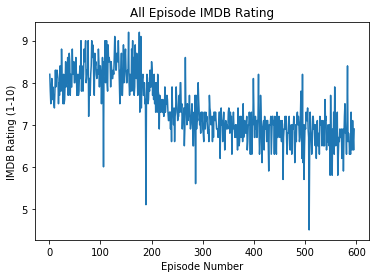

In [83]:
#plot of episode ratings
ep_2 = plt.plot(episode_df["episode_id"], episode_df["imdb_rating"])
plt.title("All Episode IMDB Rating")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating (1-10)")
plt.savefig("static/images/2Episode_rating.png")

In [32]:
#count for all character lines, top 10
char_lines = pd.read_sql('select c.name as "character", count(*) as "line_count" from characters c join s_lines s on s.character_id=c.char_id group by c.name order by count(*) desc limit 10', conn)
char_lines

,character,line_count
0,Homer Simpson,28163
1,Marge Simpson,13287
2,Bart Simpson,13198
3,Lisa Simpson,10891
4,C. Montgomery Burns,3120
5,Moe Szyslak,2809
6,Seymour Skinner,2388
7,Ned Flanders,2056
8,Grampa Simpson,1875
9,Milhouse Van Houten,1798


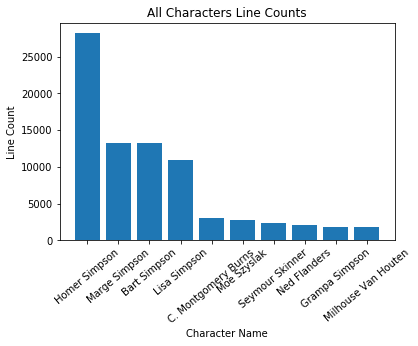

In [130]:
#All characters total line count
ws_1 = plt.bar(char_lines["character"], char_lines["line_count"], align="center")
plt.xticks(char_lines["character"], rotation=40)
plt.title("All Characters Line Counts")
plt.ylabel("Line Count")
plt.xlabel("Character Name")
plt.savefig("static/images/3All_char_linecount.png", bbox_inches = 'tight')

In [34]:
#All character word count, top 10
char_words = pd.read_sql('select c.name as "character", sum(word_count)  as "word_count"from characters c join s_lines s on s.character_id=c.char_id group by c.name order by sum(word_count) desc limit 10', conn)
char_words

,character,word_count
0,Homer Simpson,273780.0
1,Marge Simpson,125666.0
2,Bart Simpson,110814.0
3,Lisa Simpson,100576.0
4,C. Montgomery Burns,36623.0
5,Moe Szyslak,32855.0
6,Seymour Skinner,28117.0
7,Ned Flanders,22909.0
8,Krusty the Clown,20897.0
9,Grampa Simpson,20168.0


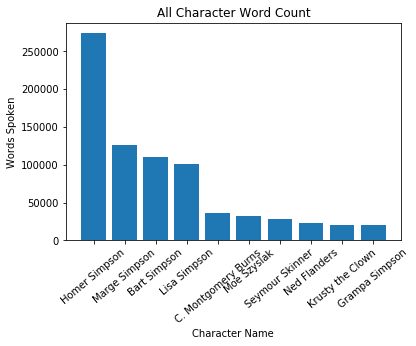

In [127]:
#character word count plot
ws_2 = plt.bar(char_words["character"], char_words["word_count"], align="center")
plt.xticks(char_words["character"], rotation=40)
plt.title("All Character Word Count")
plt.ylabel("Words Spoken")
plt.xlabel("Character Name")
plt.savefig("static/images/4All_char_wordcount.png", bbox_inches = 'tight')

In [36]:
#Non-Simpson character line counts
char_lines_ns = pd.read_sql('select c.name as "character", count(*) as "line_count" from characters c join s_lines s on s.character_id=c.char_id where c.Simpson_fam="False" group by c.name order by count(*) desc limit 10', conn)
char_lines_ns

,character,line_count
0,C. Montgomery Burns,3120
1,Moe Szyslak,2809
2,Seymour Skinner,2388
3,Ned Flanders,2056
4,Grampa Simpson,1875
5,Milhouse Van Houten,1798
6,Chief Wiggum,1796
7,Krusty the Clown,1720
8,Nelson Muntz,1145
9,Lenny Leonard,1144


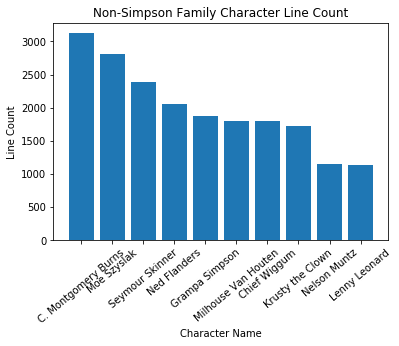

In [128]:
#Plot of non family line count plot
ns_1 = plt.bar(char_lines_ns["character"], char_lines_ns["line_count"], align="center")
plt.xticks(char_lines_ns["character"], rotation=40)
plt.title("Non-Simpson Family Character Line Count")
plt.ylabel("Line Count")
plt.xlabel("Character Name")
plt.savefig("static/images/5NS_char_linecount.png", bbox_inches = 'tight')

In [14]:
#Non-Simpson Character word spoken count
char_words_ns = pd.read_sql('select c.name as "character", sum(word_count)  as "word_count" from characters c join s_lines s on s.character_id=c.char_id where c.Simpson_fam="False" group by c.name order by sum(word_count) desc limit 10', conn)
char_words_ns

,character,word_count
0,C. Montgomery Burns,36623.0
1,Moe Szyslak,32855.0
2,Seymour Skinner,28117.0
3,Ned Flanders,22909.0
4,Krusty the Clown,20897.0
5,Grampa Simpson,20168.0
6,Chief Wiggum,19992.0
7,Kent Brockman,16311.0
8,Milhouse Van Houten,14985.0
9,Apu Nahasapeemapetilon,11483.0


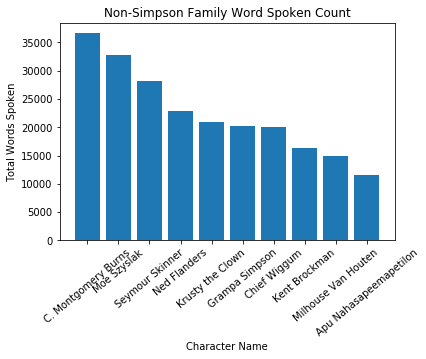

In [129]:
#non-Simpson word spoken count
ns_2 = plt.bar(char_words_ns["character"], char_words_ns["word_count"], align="center")
plt.xticks(char_words_ns["character"], rotation=40)
plt.title("Non-Simpson Family Word Spoken Count")
plt.xlabel("Character Name")
plt.ylabel("Total Words Spoken")
plt.savefig("static/images/6NS_char_wordcount.png", bbox_inches = 'tight')

In [16]:
#gender line breakdown
gender_lines = pd.read_sql('select c.gender, count(*) as "line_count"from characters c join s_lines s on s.character_id=c.char_id where c.gender!="u" group by c.gender order by count(*) desc', conn)
gender_lines

,gender,line_count
0,m,91273
1,f,32561


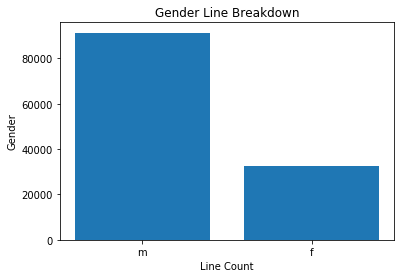

In [88]:
#gender line breakdown plot
gender_1 = plt.bar(gender_lines["gender"], gender_lines["line_count"], align="center")
plt.title("Gender Line Breakdown")
plt.xlabel("Line Count")
plt.ylabel("Gender")
plt.savefig("static/images/7gender_linecount.png")

In [18]:
#gender breakdown words
gender_words = pd.read_sql('select c.gender, sum(word_count) as "word_count" from characters c join s_lines s on s.character_id=c.char_id where c.gender<>"u" group by c.gender order by sum(word_count) desc', conn)
gender_words

,gender,word_count
0,m,925116.0
1,f,305657.0


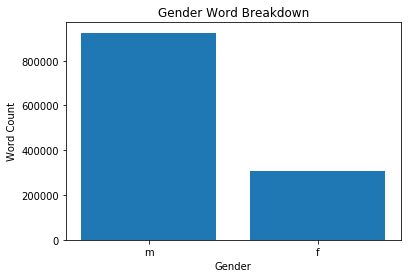

In [89]:
#gender breakdown of words, plot
gender_2 = plt.bar(gender_words["gender"], gender_words["word_count"], align="center")
plt.title("Gender Word Breakdown")
plt.ylabel("Word Count")
plt.xlabel("Gender")
plt.savefig("static/images/7gender_wordcount.png")

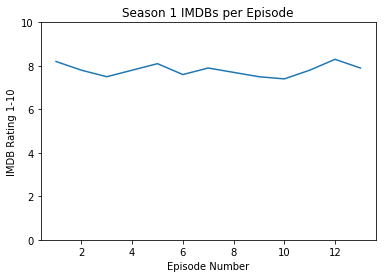

In [90]:
#season one rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=1", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 1 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season1_imdb.png")

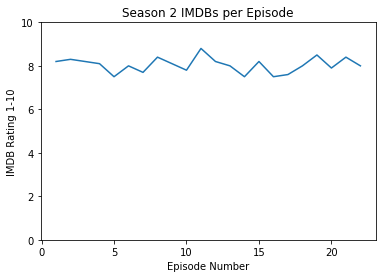

In [91]:
#season two rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=2", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 2 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season2_imdb.png")

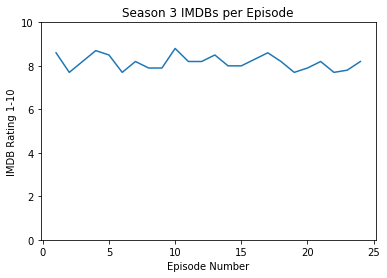

In [92]:
#season three rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=3", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 3 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season3_imdb.png")

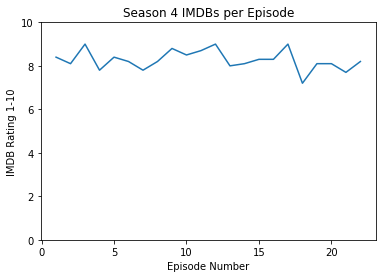

In [93]:
#season four rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=4", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 4 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season4_imdb.png")

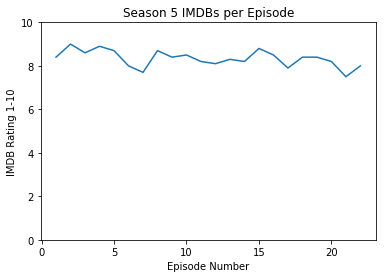

In [94]:
#season five rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=5", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 5 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season5_imdb.png")

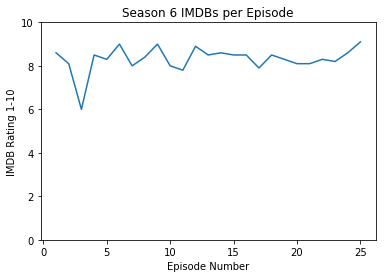

In [95]:
#season six rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=6", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 6 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season6_imdb.png")

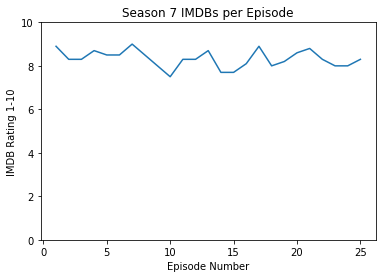

In [96]:
#season seven rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=7", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 7 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season7_imdb.png")

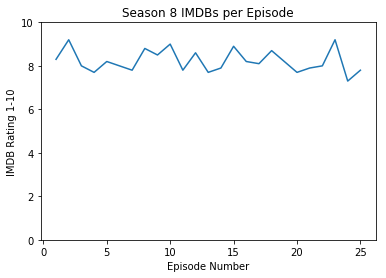

In [97]:
#season eight rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=8", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 8 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season8_imdb.png")

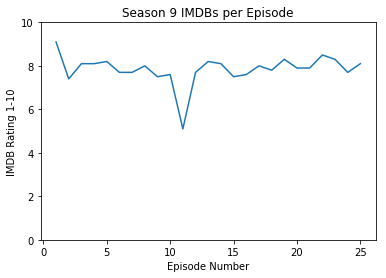

In [98]:
#season nine rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=9", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 9 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season9_imdb.png")

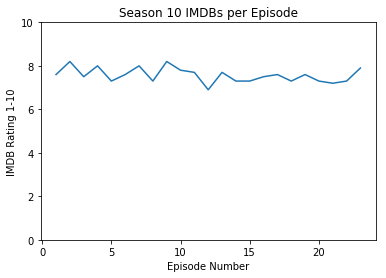

In [99]:
#season 10 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=10", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 10 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season10_imdb.png")

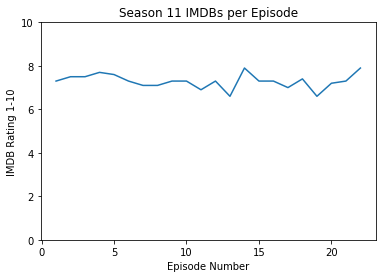

In [100]:
#season 11 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=11", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 11 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season11_imdb.png")

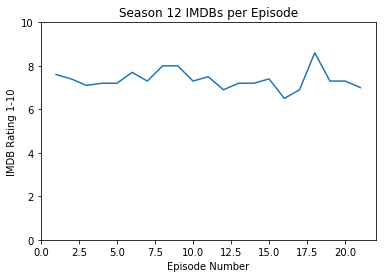

In [101]:
#season 12 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=12", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 12 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season12_imdb.png")

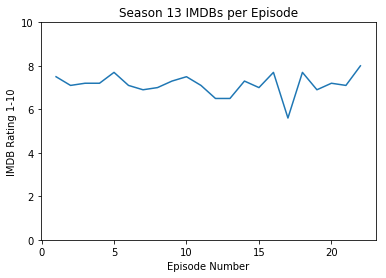

In [102]:
#season 13 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=13", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 13 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season13_imdb.png")

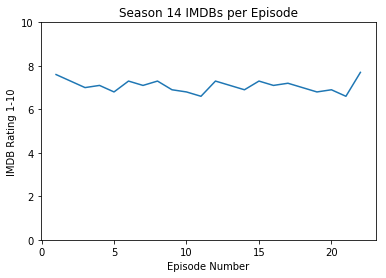

In [103]:
#season 14 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=14", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 14 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season14_imdb.png")

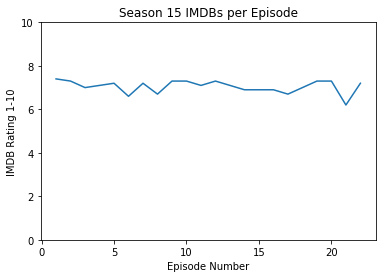

In [104]:
#season 15 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=15", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 15 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season15_imdb.png")

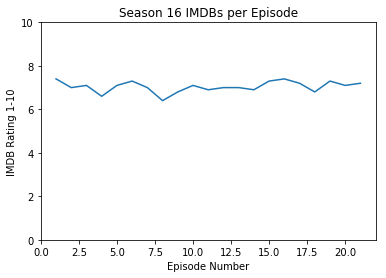

In [105]:
#season 16 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=16", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 16 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season16_imdb.png")

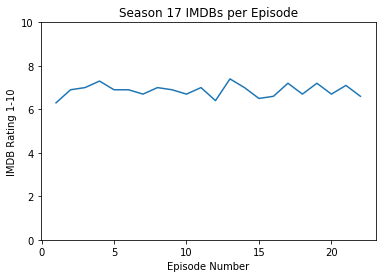

In [106]:
#season 17 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=17", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 17 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season17_imdb.png")

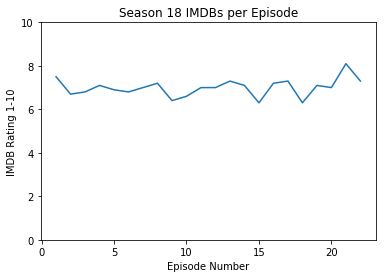

In [107]:
#season 18 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=18", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 18 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season18_imdb.png")

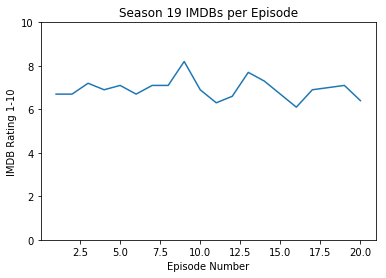

In [108]:
#season 19 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=19", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 19 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season19_imdb.png")

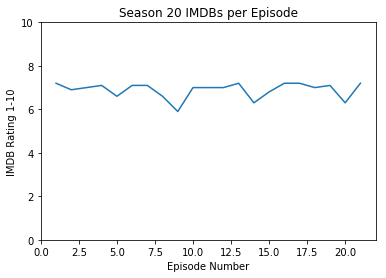

In [109]:
#season 20 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=20", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 20 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season20_imdb.png")

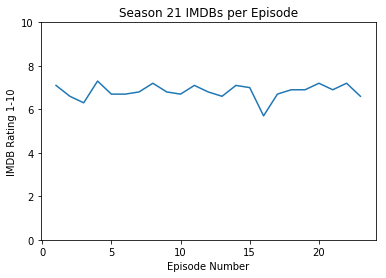

In [110]:
#season 21 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=21", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 21 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season21_imdb.png")

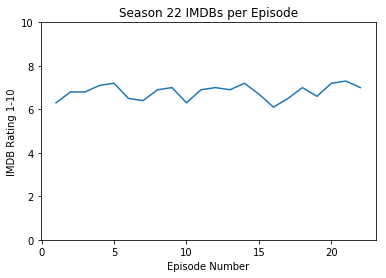

In [111]:
#season 22 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=22", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 22 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season22_imdb.png")

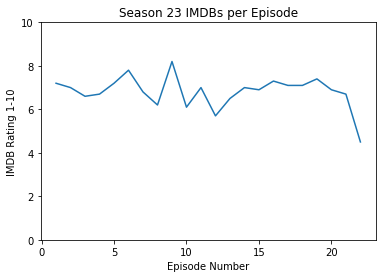

In [112]:
#season 23 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=23", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 23 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season23_imdb.png")

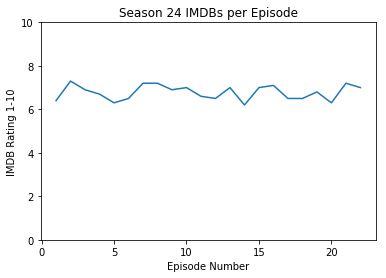

In [113]:
#season 24 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=24", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 24 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season24_imdb.png")

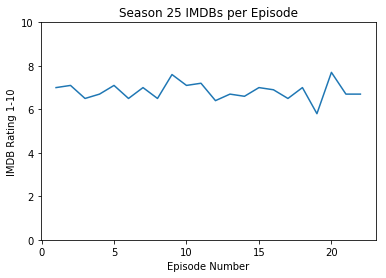

In [114]:
#season 25 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=25", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 25 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season25_imdb.png")

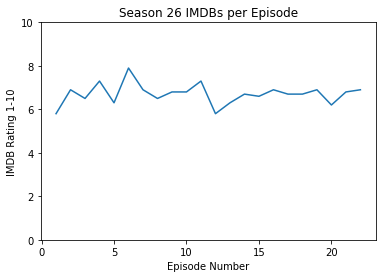

In [115]:
#season 26 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=26", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 26 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season26_imdb.png")

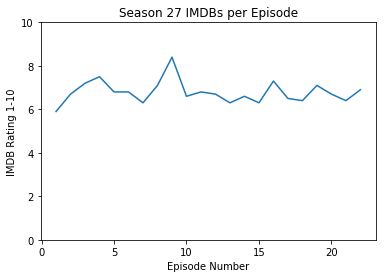

In [116]:
#season 27 rating table
season1_df = pd.read_sql("select season_episode_no, imdb_rating from episodes where season=27", conn)
plt.plot(season1_df["season_episode_no"], season1_df["imdb_rating"])
plt.ylim(0,10)
plt.title("Season 27 IMDBs per Episode")
plt.xlabel("Episode Number")
plt.ylabel("IMDB Rating 1-10")
plt.savefig("static/images/season27_imdb.png")